In [39]:
import pandas as pd
import os
import sweetviz as sv
import geopandas as gpd
from shapely import wkt
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import geodatasets
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import warnings
import plotly.express as px
from geopy.geocoders import ArcGIS
import geopandas as gpd
import numpy as np
import re
warnings.filterwarnings('ignore')

In [28]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Project Management/Head Competition/Code/Datasets')

In [29]:
os.listdir('.')

['20240117-2024-Facilities-Details-FCI.xlsx',
 'city_451_BCCAQv2_RCP85_annual_plus30_ensemble.csv',
 'CoH-CFEM-2023-Facilities-Details.xlsx',
 'facilities_wlocation.csv',
 'Metadata',
 'Ward_Boundaries.geojson',
 'Ward_Boundaries.json',
 'Ward_Boundaries_json.json',
 'weather_databases']

In [30]:
df_1=pd.read_excel("CoH-CFEM-2023-Facilities-Details.xlsx").loc[1:,:]
df_1.columns=df_1.iloc[0]
df_1 = df_1.drop(1)
df_1.head()

1,Asset Name,Asset Type,Asset Address,Asset Size,Asset Measure Unit,Asset Date Built,2023 FCI Rating
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,Sq.Ft.,1986-04-26,0.066459
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,Sq.Ft.,1973-01-02,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,Sq.Ft.,2011-01-01,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,Sq.Ft.,1982-01-02,0.012063
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,Sq.Ft.,1996-01-02,0.082996


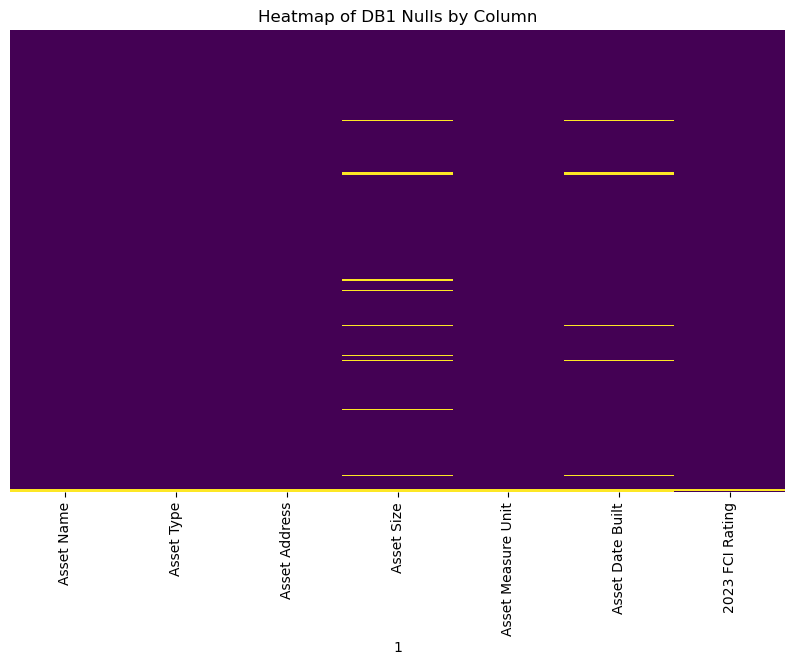

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of DB1 Nulls by Column')
plt.show()

In [32]:
# Count nulls per column
nulls_per_column = df_1.isnull().sum()
print("Nulls per column:")
print(nulls_per_column)

# Total number of nulls in the DataFrame
total_nulls = df_1.isnull().sum().sum()
print("\nTotal number of nulls in the DataFrame:", total_nulls)

Nulls per column:
1
Asset Name             3
Asset Type             3
Asset Address          3
Asset Size            15
Asset Measure Unit     3
Asset Date Built      10
2023 FCI Rating        2
dtype: int64

Total number of nulls in the DataFrame: 39


In [33]:
df_1=df_1.iloc[0:497]

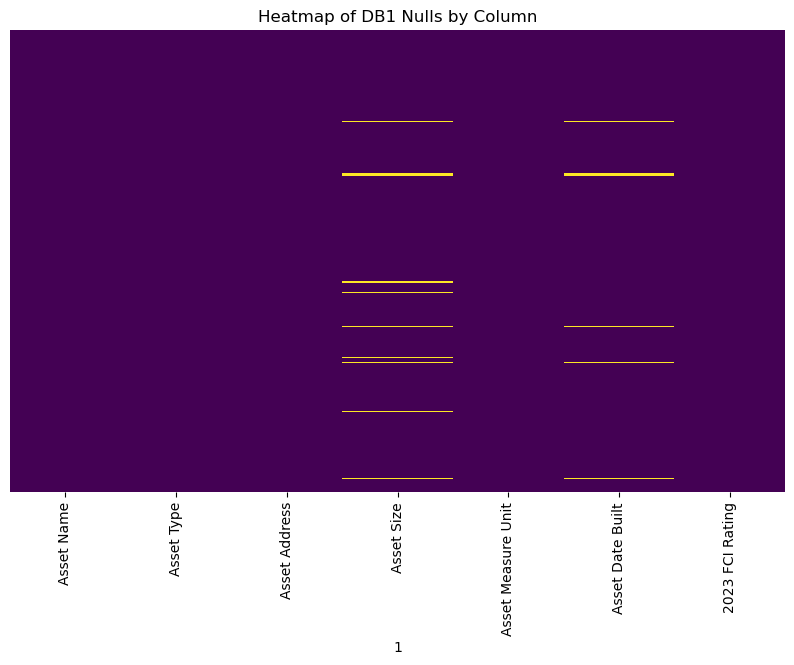

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of DB1 Nulls by Column')
plt.show()

In [44]:
np.median(df_1["Asset Size"])

2456.0

                                             |          | [  0%]   00:00 -> (? left)


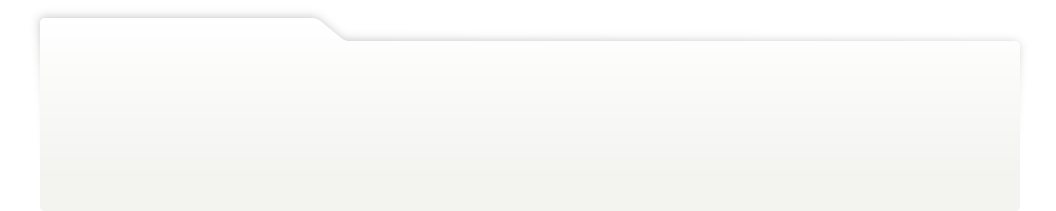
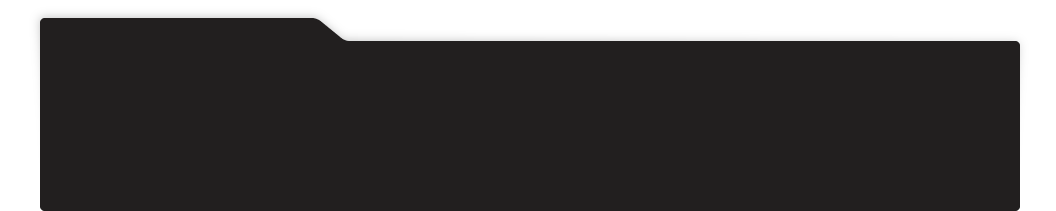
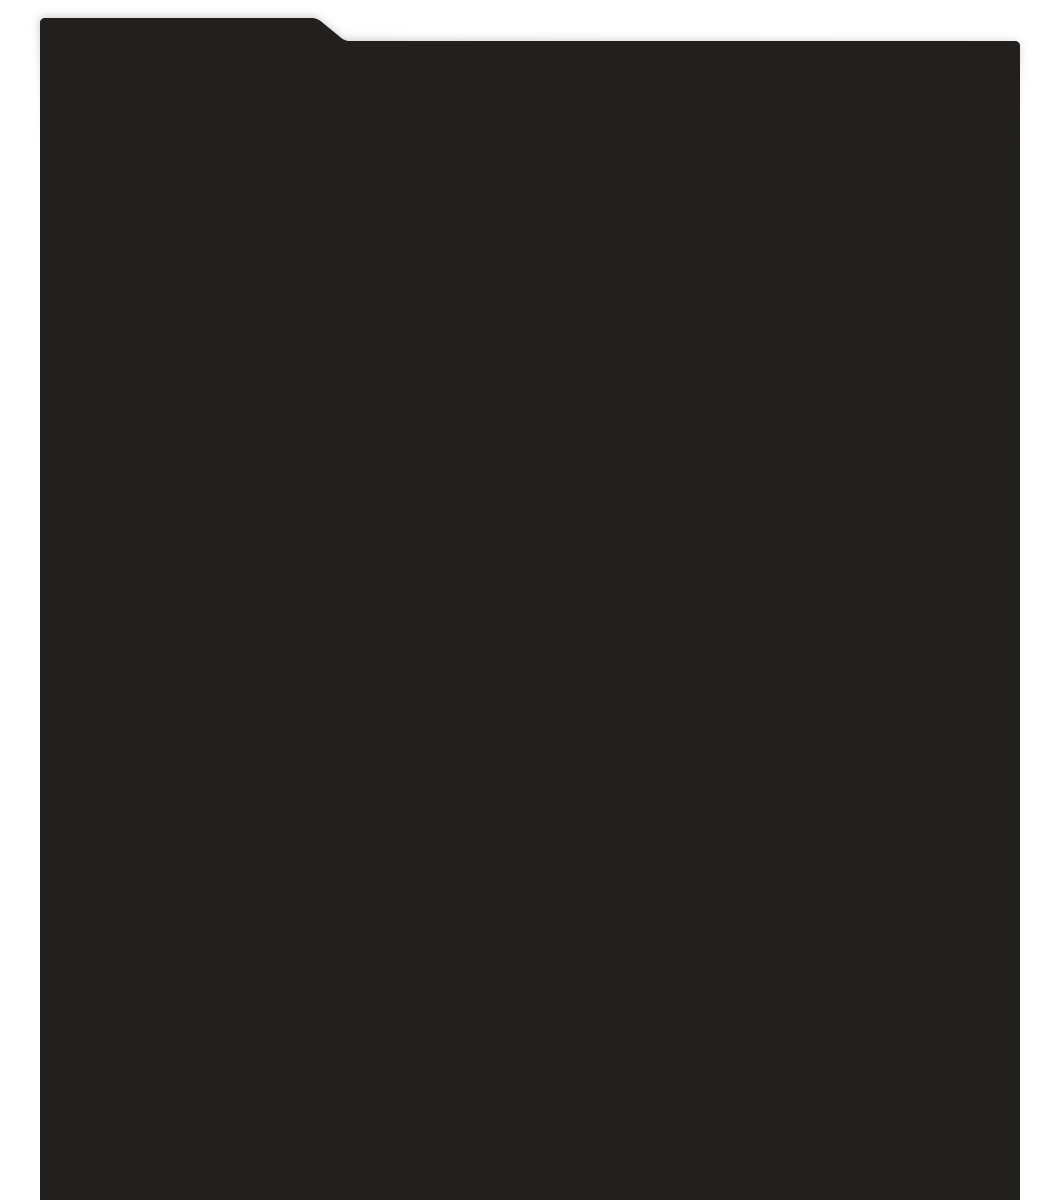
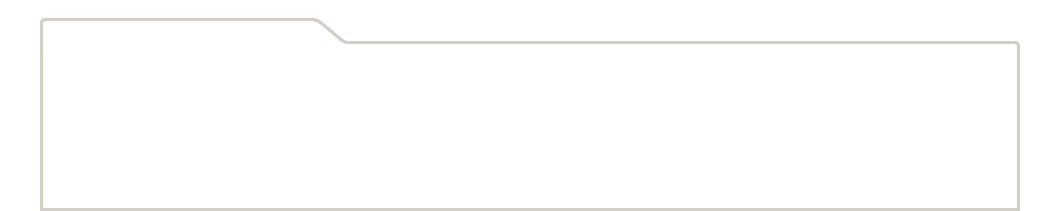
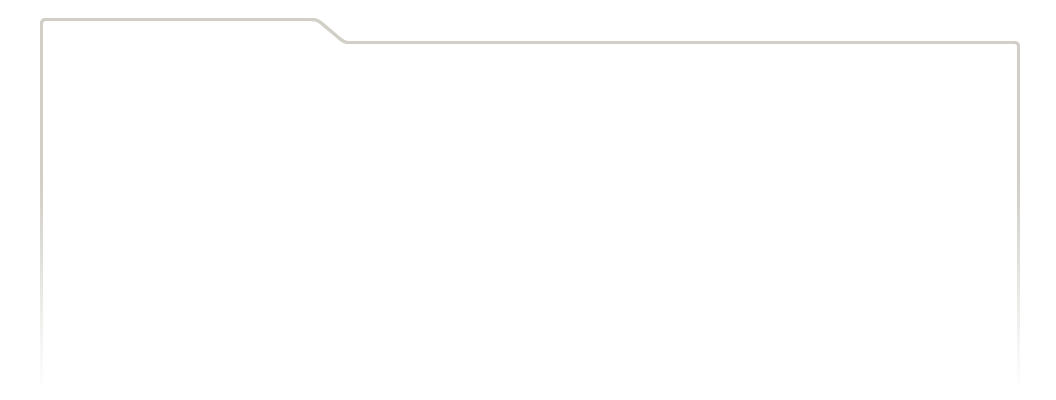
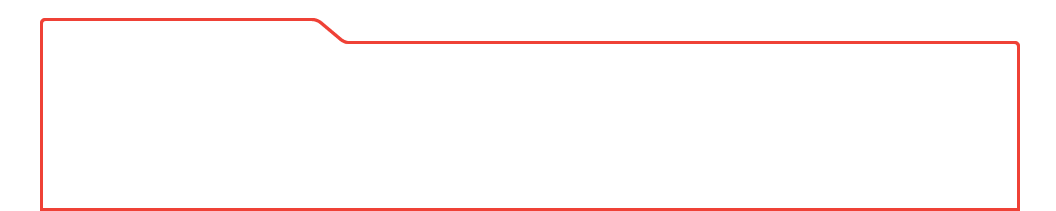
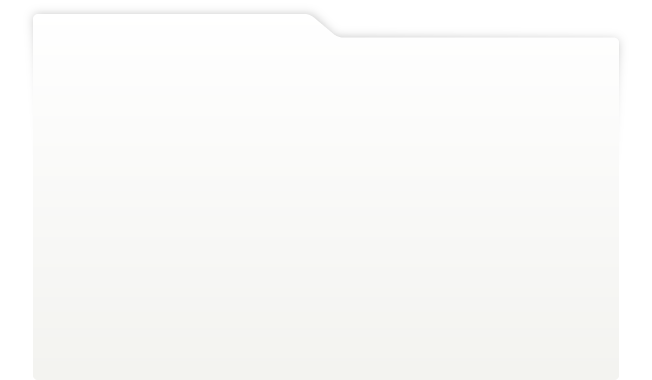
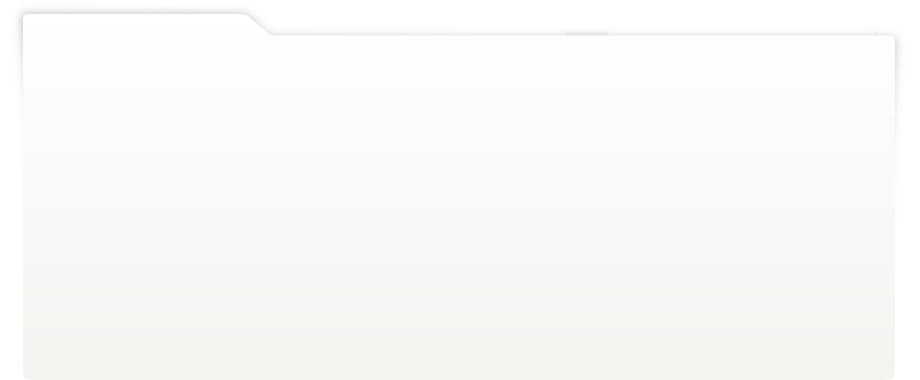
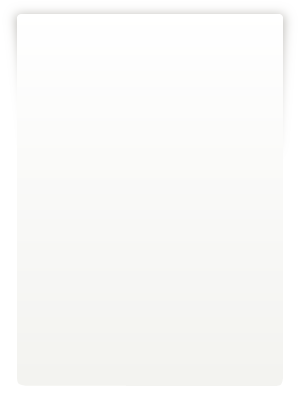
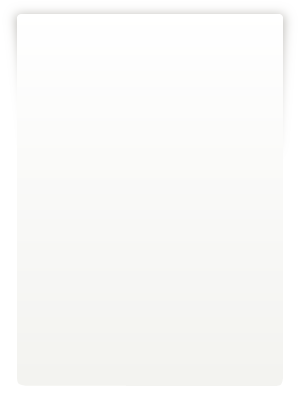
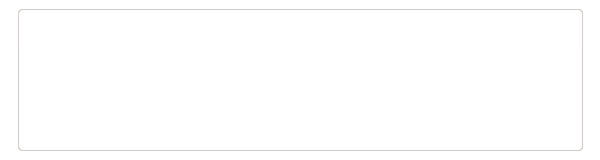
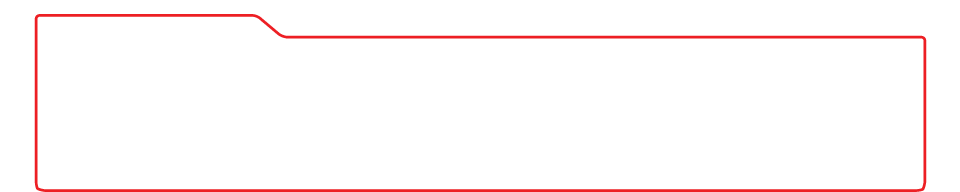
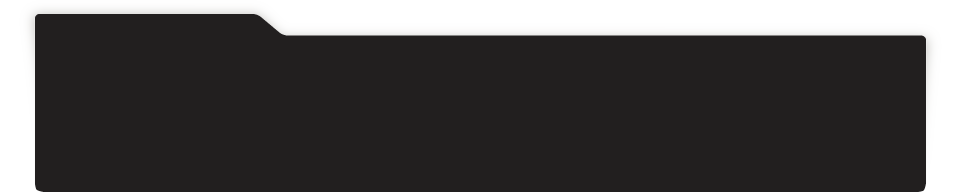
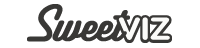
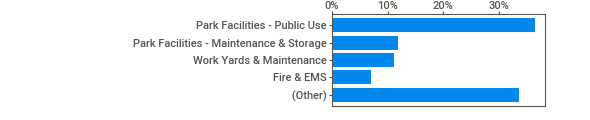
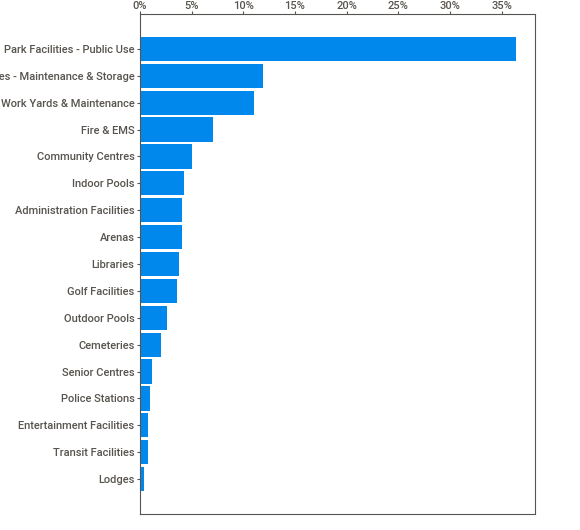
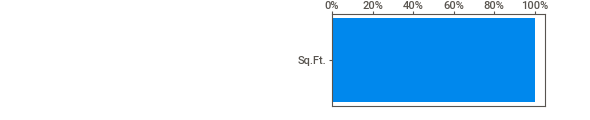
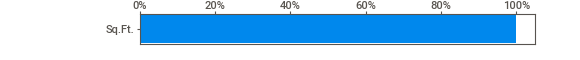
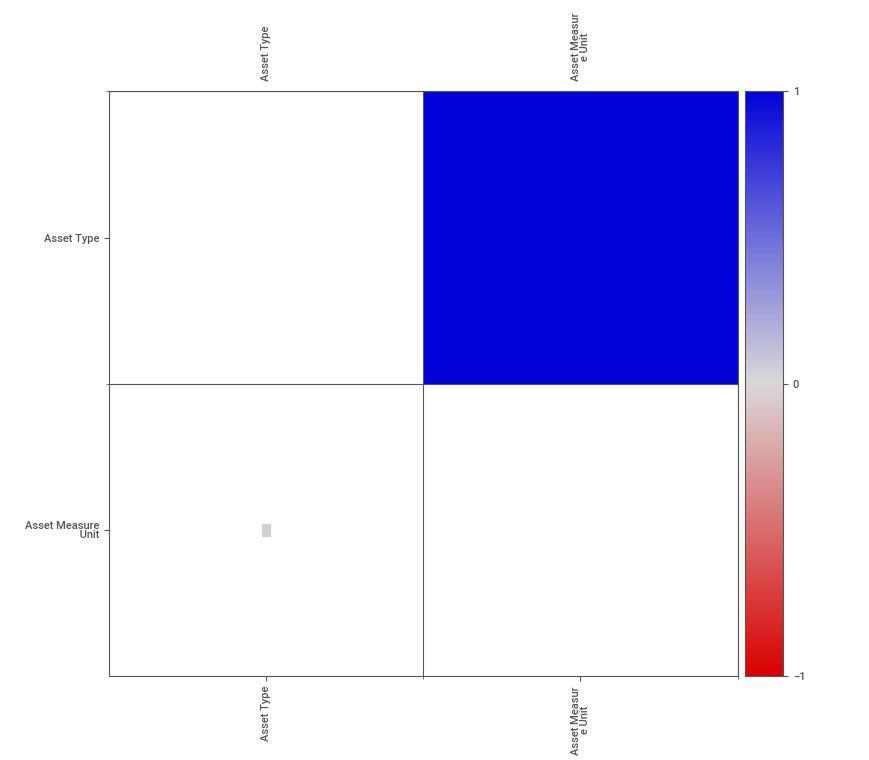
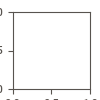

In [45]:
sv_report = sv.analyze(df_1) 
sv_report.show_notebook()

In [35]:
df=pd.read_excel("20240117-2024-Facilities-Details-FCI.xlsx").loc[1:,:]
df.columns=df.iloc[0]
df = df.drop(1)
df.head()

1,Asset Name,Asset Type,Asset Name: Address,Asset Name: Size,Asset Name: Measure Unit,Asset Name: Date Built,Custom: Assessment Date,Asset Name: Current Replacement Value,Current Needs Value,Asset Name: Current FCI
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,Sq.Ft.,1986-04-26,Model,12828450.29,972839.51,0.075835
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,Sq.Ft.,1973-01-02,2017,395826.67,39145.35,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,Sq.Ft.,2011-01-01,2017,14585.22,0,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,Sq.Ft.,1982-01-02,2020,13716984.75,304172.85,0.022175
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,Sq.Ft.,1996-01-02,2011,225260.62,18695.65,0.082996


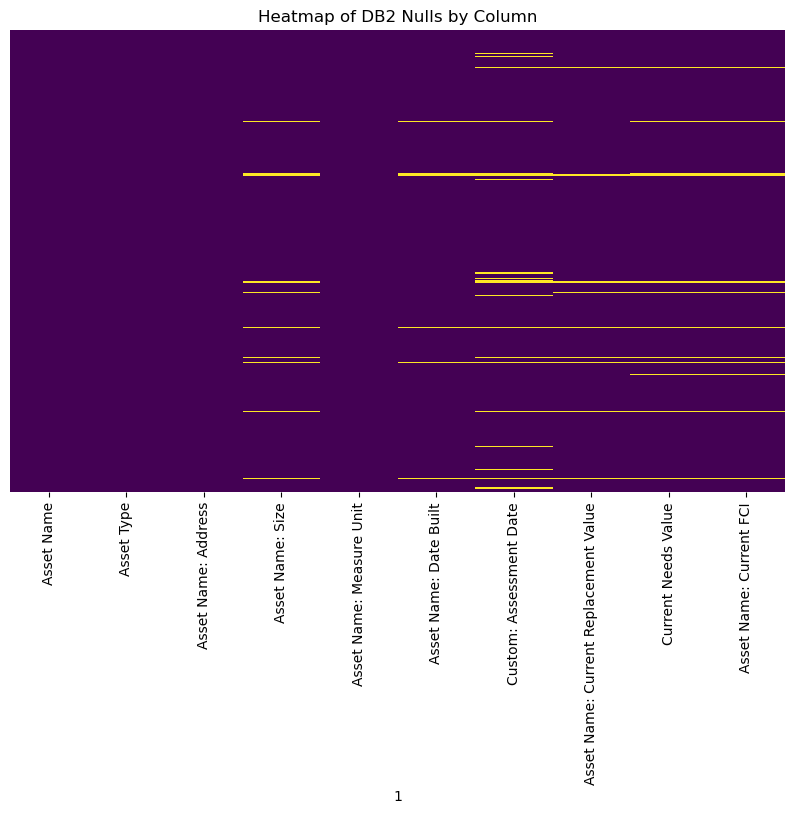

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of DB2 Nulls by Column')
plt.show()

In [37]:
# Count nulls per column
nulls_per_column = df.isnull().sum()
print("Nulls per column:")
print(nulls_per_column)

# Total number of nulls in the DataFrame
total_nulls = df.isnull().sum().sum()
print("\nTotal number of nulls in the DataFrame:", total_nulls)

Nulls per column:
1
Asset Name                                0
Asset Type                                0
Asset Name: Address                       0
Asset Name: Size                         12
Asset Name: Measure Unit                  0
Asset Name: Date Built                    7
Custom: Assessment Date                  25
Asset Name: Current Replacement Value    11
Current Needs Value                      14
Asset Name: Current FCI                  14
dtype: int64

Total number of nulls in the DataFrame: 83
